In [1]:
import matplotlib.pyplot as plt
from coffea.util import load
import hist
import mplhep as hep
from pocket_coffea.utils.plot_utils import stack_sum

In [2]:
filename = "/work/mmarcheg/BTVNanoCommissioning/output/pocket_coffea/ggH_proxy/ggH_proxy_2018UL_twojets/output_all.coffea"
o = load(filename)
o.keys()

dict_keys(['sum_genweights', 'sumw', 'cutflow', 'variables', 'columns', 'processing_metadata', 'seed_fatjet_chunk'])

In [3]:
o['variables'].keys()

dict_keys(['MuonGood_eta_1', 'MuonGood_pt_1', 'MuonGood_phi_1', 'MuonGood_eta_2', 'MuonGood_pt_2', 'MuonGood_phi_2', 'FatJetGood_eta', 'FatJetGood_pt', 'FatJetGood_phi', 'FatJetGood_mass', 'FatJetGood_msoftdrop', 'FatJetGood_tau21', 'FatJetGood_btagDDBvLV2', 'FatJetGood_btagDDCvLV2', 'FatJetGood_btagDDCvBV2', 'FatJetGood_particleNetMD_Xbb_QCD', 'FatJetGood_particleNetMD_Xcc_QCD', 'FatJetGood_deepTagMD_ZHbbvsQCD', 'FatJetGood_deepTagMD_ZHccvsQCD', 'FatJetGood_btagHbb', 'FatJetGood_eta_1', 'FatJetGood_pt_1', 'FatJetGood_phi_1', 'FatJetGood_mass_1', 'FatJetGood_msoftdrop_1', 'FatJetGood_tau21_1', 'FatJetGood_btagDDBvLV2_1', 'FatJetGood_btagDDCvLV2_1', 'FatJetGood_btagDDCvBV2_1', 'FatJetGood_particleNetMD_Xbb_QCD_1', 'FatJetGood_particleNetMD_Xcc_QCD_1', 'FatJetGood_deepTagMD_ZHbbvsQCD_1', 'FatJetGood_deepTagMD_ZHccvsQCD_1', 'FatJetGood_btagHbb_1', 'FatJetGood_eta_2', 'FatJetGood_pt_2', 'FatJetGood_phi_2', 'FatJetGood_mass_2', 'FatJetGood_msoftdrop_2', 'FatJetGood_tau21_2', 'FatJetGood_bta

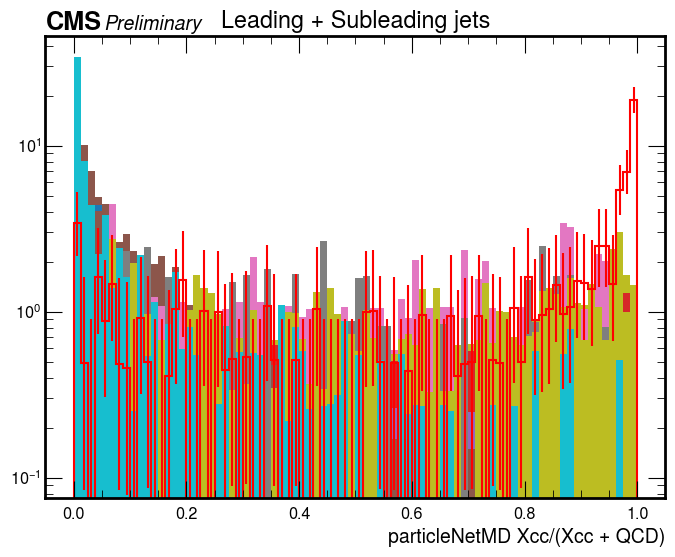

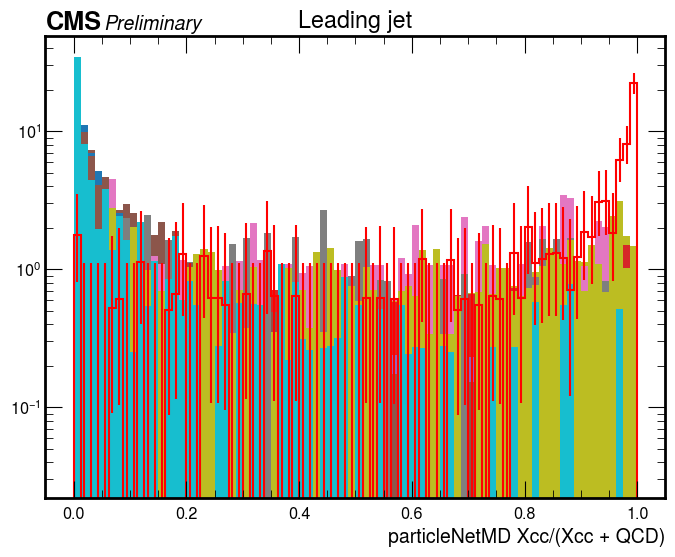

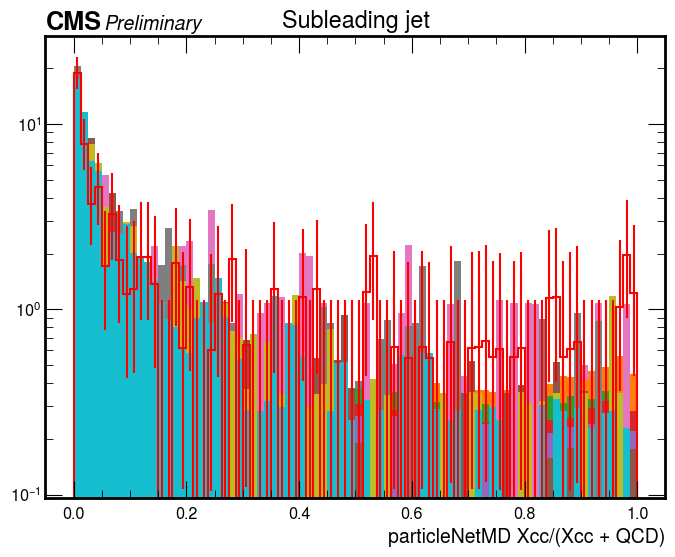

In [4]:
fontsize = 14
plt.style.use([hep.style.ROOT, {'font.size': fontsize}])
titles = ["Leading + Subleading jets", "Leading jet", "Subleading jet"]
for i, histname in enumerate(['FatJetGood_particleNetMD_Xcc_QCD', 'FatJetGood_particleNetMD_Xcc_QCD_1', 'FatJetGood_particleNetMD_Xcc_QCD_2']):
    h = o['variables'][histname]
    sample_signal = 'GluGluHToCC_cc'
    h_dict_proxy = {}
    h_dict_ggh = {}
    for sample in h:
        if sample.startswith('QCD'):
            h_dict_proxy[sample] = h[sample][{'cat' : 'pt450msd40', 'variation' : 'nominal', 'year' : '2018'}]
        elif sample == sample_signal:
            h_dict_ggh[sample] = h[sample][{'cat' : 'pt450msd40', 'variation' : 'nominal', 'year' : '2018'}]
    fig, ax = plt.subplots(1, 1, figsize=[8,6])
    hep.cms.text("Preliminary", fontsize=fontsize, loc=0, ax=ax)
    stack_proxy = hist.Stack.from_dict(h_dict_proxy)
    stack_ggh = hist.Stack.from_dict(h_dict_ggh)
    stack_proxy.plot(histtype='fill', density=True);
    stack_ggh.plot(color='red', density=True);
    #ax.legend();
    ax.set_yscale('log')
    ax.set_title(titles[i])